In [150]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties

In [11]:
#国家面积和人口
X = [
    [9670250, 1392358258],
    [2980000, 1247923065],
    [9629091, 317408015],
    [8514877, 201032714],
    [377873, 127270000],
    [7692024, 23540517],
    [9984670, 34591000],
    [17075400, 143551289],
    [513115, 67041000],
    [181035, 14805358],
    [99600, 50400000],
    [120538, 24052231]]

#转换成numpy array
X = np.array(X)

In [12]:
X

array([[   9670250, 1392358258],
       [   2980000, 1247923065],
       [   9629091,  317408015],
       [   8514877,  201032714],
       [    377873,  127270000],
       [   7692024,   23540517],
       [   9984670,   34591000],
       [  17075400,  143551289],
       [    513115,   67041000],
       [    181035,   14805358],
       [     99600,   50400000],
       [    120538,   24052231]])

In [17]:
a = X[:, :1] / 17075400.0 * 10000
b = X[:, 1:] / 1392358258.0 * 10000
X_1 = np.concatenate((a, b), axis=1)
X_1

array([[ 5663.26411094, 10000.        ],
       [ 1745.20069808,  8962.65783486],
       [ 5639.15984399,  2279.64328273],
       [ 4986.63398808,  1443.82893444],
       [  221.29671926,   914.06072589],
       [ 4504.7401525 ,   169.06939622],
       [ 5847.40035373,   248.43462378],
       [10000.        ,  1030.99391392],
       [  300.49954906,   481.49245796],
       [  106.02094241,   106.33296362],
       [   58.32952669,   361.97580407],
       [   70.59161132,   172.74455667]])

In [44]:
#现在我们把训练数据和对应的分类放入分类器中进行训练，
#这里没有噪点出现因为我们把min_samples设置成了1
cls = DBSCAN(eps=2000, min_samples=1).fit(X_1)

In [45]:
cls.labels_

array([0, 1, 2, 2, 3, 2, 2, 4, 3, 3, 3, 3], dtype=int64)

In [34]:
X_1[6,0]

5847.400353725242

In [41]:
#类簇的数量
n_clusters = len(set(cls.labels_))
print ('n_clusters',n_clusters)

n_clusters 5


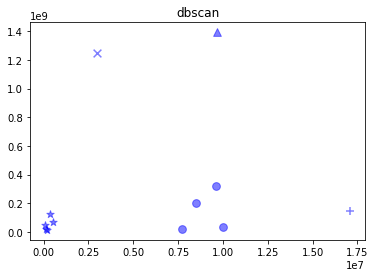

In [51]:
#画图
markers = ['^', 'x', 'o', '*', '+']
for i in range(n_clusters):
    my_members = cls.labels_ == i      #  这个表述方法很好
    plt.scatter(X[my_members, 0], X[my_members, 1], s=60,marker=markers[i], c='b', alpha=0.5)

plt.title('dbscan')
plt.show()

cls = DBSCAN(eps=2000, min_samples=1).fit(X)的使用：其中eps的含义是是设定一个阈值，既是在根据密度向外扩展的过程中如果发现在这个阈值距离范围内找不到向量，那么就认为这个聚簇已经查找完毕。这里设置2000，因为归一化以后所有的变量都落在一个10000*10000的区间单位。

而min_samples的含义是聚类簇最小应该拥有多少个向量。所以不存再噪点。

###  示例2

In [75]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist

In [56]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)
dataset

{'data': ['From: healta@saturn.wwc.edu (Tammy R Healy)\nSubject: Re: who are we to judge, Bobby?\nLines: 38\nOrganization: Walla Walla College\nLines: 38\n\nIn article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:\n>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )\n>Subject: Re: who are we to judge, Bobby?\n>Date: Wed, 14 Apr 1993 21:33:56 GMT\n>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:\n>>Bobby,\n>>\n>>I would like to take the liberty to quote from a Christian writer named \n>>Ellen G. White.  I hope that what she said will help you to edit your \n>>remarks in this group in the future.\n>>\n>>"Do not set yourself as a standard.  Do not make your opinions, your views \n>>of duty, your interpretations of scripture, a criterion for others and in \n>>your heart condemn them if they do not come up to your ideal."\n>>                         Thoughts Fromthe Mount of Blessing p. 124\n>>\n>>I hop

In [59]:
dataset.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [60]:
len(dataset.data)

3387

In [63]:
dataset.data[1]

"From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana)\nSubject: Re: More gray levels out of the screen\nOrganization: Tampere University of Technology\nLines: 21\nDistribution: inet\nNNTP-Posting-Host: cc.tut.fi\n\nIn article <1993Apr6.011605.909@cis.uab.edu> sloan@cis.uab.edu\n(Kenneth Sloan) writes:\n>\n>Why didn't you create 8 grey-level images, and display them for\n>1,2,4,8,16,32,64,128... time slices?\n\nBy '8 grey level images' you mean 8 items of 1bit images?\nIt does work(!), but it doesn't work if you have more than 1bit\nin your screen and if the screen intensity is non-linear.\n\nWith 2 bit per pixel; there could be 1*c_1 + 4*c_2 timing,\nthis gives 16 levels, but they are linear if screen intensity is\nlinear.\nWith 1*c_1 + 2*c_2 it works, but we have to find the best\ncompinations -- there's 10 levels, but 16 choises; best 10 must be\nchosen. Different compinations for the same level, varies a bit, but\nthe levels keeps their order.\n\nReaders should verify what I wrote... :-)

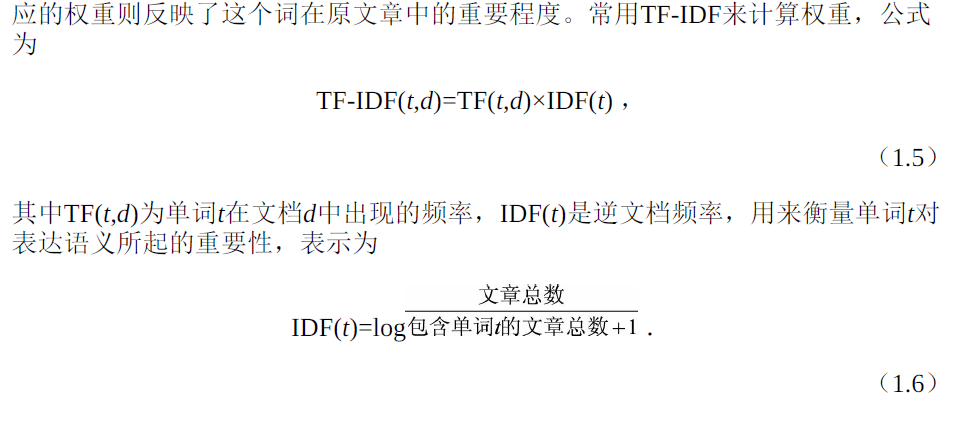

In [64]:
vectorizer = TfidfVectorizer(max_df=0.5,              # 词语最大文档频率不应大于0.5
                                       max_features=20000, # 词汇表收录词语最大值
                                       min_df=2,                  # 词语最小文档频次不应低于2次
                                       stop_words='english',  # 使用英文停用词表去停用词
                                       use_idf=True)             # 向量值计算使用TF-IDF
X = vectorizer.fit_transform(dataset.data)

In [84]:
X.shape

(3387, 20000)

In [93]:
# X_1 = X.copy()
# X_1 = np.array(X_1)
# X_1

array(<3387x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 352875 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [132]:
X_1.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01091157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [115]:
list(X)[0]

<1x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 94 stored elements in Compressed Sparse Row format>

###  用toarray() 方法处理 上一行中的对象

In [122]:
# print(list(X)[0])
# X_1 = X.copy()
# for i in range(len(X_1)):
#     X_1[i] = X_1[i].toarray()
X_1[0] = X_1[0].toarray()

<1x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 20000 stored elements in Compressed Sparse Row format>

In [123]:
X??

In [157]:
X.toarray().shape

(3387, 20000)

In [74]:
# 实际簇数量
labels = dataset.target
true_k = np.unique(labels).shape[0]
true_k

4

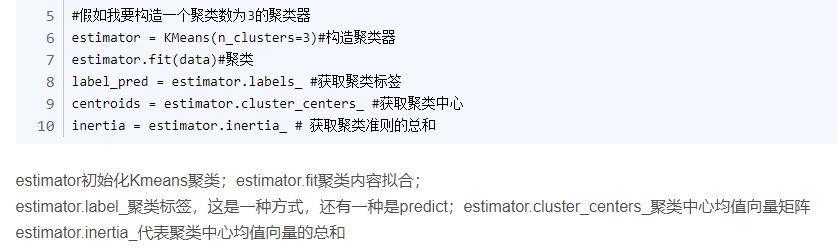

###  肘部法

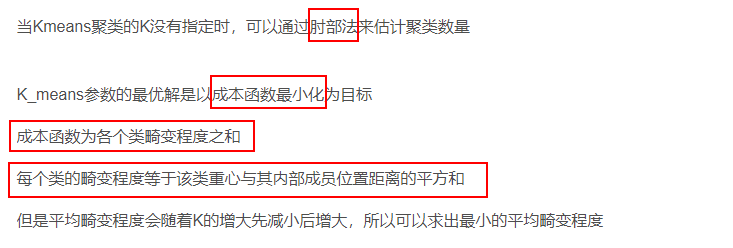

In [76]:
esimator = MiniBatchKMeans(n_clusters=4)
esimator.fit(X)
label_pred = esimator.labels_ # 获取聚类标签
centroids  = esimator.cluster_centers_ # 获取聚类中心
inertia = esimator.inertia_  # 获取聚类准则的总和

In [78]:
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.003131,0.005314,0.000290,0.001254,0.000723,0.000358,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000307,0.000000,0.000000,0.000000,0.000000
1,0.000384,0.001430,0.000000,0.000000,0.000000,0.000000,0.000102,0.000000,0.000000,0.000054,...,0.000162,0.001675,0.000172,0.000000,0.000372,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001970,0.001690,0.000002,0.000021,0.000054,0.000000,0.000195,0.000018,0.000361,0.000098,...,0.000135,0.000000,0.000026,0.000208,0.000217,0.000181,0.000018,0.000466,0.000613,0.000067
3,0.000307,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000224,0.000000,0.000000,0.000000,0.000447,0.000000


In [133]:
cdist(X.toarray(), centroids, metric='euclidean')

array([[1.0174038 , 0.99437647, 0.99352932, 1.02158833],
       [1.01643487, 1.01353802, 0.99143222, 1.03164141],
       [1.01747728, 1.0195112 , 0.99705444, 1.03705773],
       ...,
       [0.99718906, 1.01178293, 0.98869348, 1.03192955],
       [1.01583402, 1.01105748, 0.98960089, 1.02684796],
       [1.01012958, 1.01629026, 0.98804258, 1.03312688]])

In [137]:
sum(np.min(cdist(X.toarray(), centroids, metric='euclidean'), axis=1)/ X.shape[0])

0.984887456557713

###  肘部法代码

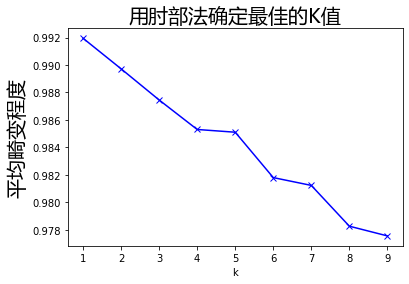

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# plt.figure()
# plt.axis([0, 5, 0, 5])
# plt.grid(True)
# plt.show()

# K =  [i for i in range(1, 10)]
K = range(1, 10)
mean_distortions = []
for k in K:
    esimator = MiniBatchKMeans(n_clusters=k)
    esimator.fit(X)
    centroids  = esimator.cluster_centers_
    mean_distortions.append(
        sum(
            np.min(
                cdist(X.toarray(), centroids, metric='euclidean'), axis=1))
        / X.shape[0])
plt.plot(K, mean_distortions, 'bx-')
plt.xlabel('k')
font = FontProperties(fname=r'c:\windows\fonts\msyh.ttc', size=20)
plt.ylabel(u'平均畸变程度', fontproperties=font)
plt.title(u'用肘部法确定最佳的K值', fontproperties=font)
plt.show()

In [163]:
dataset.target[:20]

array([0, 1, 1, 3, 1, 1, 2, 2, 2, 0, 1, 2, 3, 2, 0, 3, 3, 1, 1, 2],
      dtype=int64)

In [164]:
# 实际簇数量
labels = dataset.target
true_k = np.unique(labels).shape[0]

In [168]:
np.unique(labels).shape

4

In [165]:
km = MiniBatchKMeans(n_clusters=true_k, # 用户指定的簇数量
                  init='k-means++',  # 簇中心初始化方法
                  n_init=1,               # 用不同的初始化质心运行算法的次数。这里和KMeans类意义稍有不同，
                                            # KMeans类里的n_init是用同样的训练集数据来跑不同的初始化质心从而运行算法。
                                            # 而MiniBatchKMeans类的n_init则是每次用不一样的采样数据集来跑不同的初始化质心运行算法。
                  init_size=1000,      # 用来做质心初始值候选的样本个数，默认是batch_size的3倍，一般用默认值就可以了。
                  batch_size=1000,  # 即用来跑Mini Batch KMeans算法的采样集的大小，默认是100.
                                            # 如果发现数据集的类别较多或者噪音点较多，需要增加这个值以达到较好的聚类效果。
                  verbose=2)          # 打印运行日志

# 聚类
km.fit(X)


Init 1/1 with method: k-means++
Inertia for init 1/1: 973.667440
Minibatch iteration 1/400: mean batch inertia: 0.977910, ewa inertia: 0.977910 
Minibatch iteration 2/400: mean batch inertia: 0.976162, ewa inertia: 0.976878 
Minibatch iteration 3/400: mean batch inertia: 0.974652, ewa inertia: 0.975564 
Minibatch iteration 4/400: mean batch inertia: 0.974531, ewa inertia: 0.974954 
Minibatch iteration 5/400: mean batch inertia: 0.974290, ewa inertia: 0.974562 
Minibatch iteration 6/400: mean batch inertia: 0.973136, ewa inertia: 0.973720 
Minibatch iteration 7/400: mean batch inertia: 0.975621, ewa inertia: 0.974842 
Minibatch iteration 8/400: mean batch inertia: 0.972776, ewa inertia: 0.973622 
Minibatch iteration 9/400: mean batch inertia: 0.973351, ewa inertia: 0.973462 
Minibatch iteration 10/400: mean batch inertia: 0.971534, ewa inertia: 0.972324 
Minibatch iteration 11/400: mean batch inertia: 0.974636, ewa inertia: 0.973689 
Minibatch iteration 12/400: mean batch inertia: 0.971

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=1, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=2)

In [166]:
# 评价
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.310
Completeness: 0.469
V-measure: 0.374
Adjusted Rand-Index: 0.271
Silhouette Coefficient: 0.003


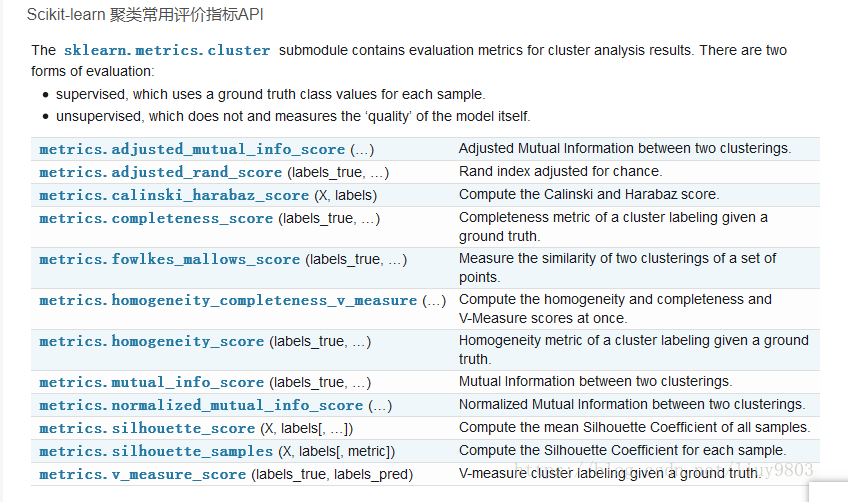

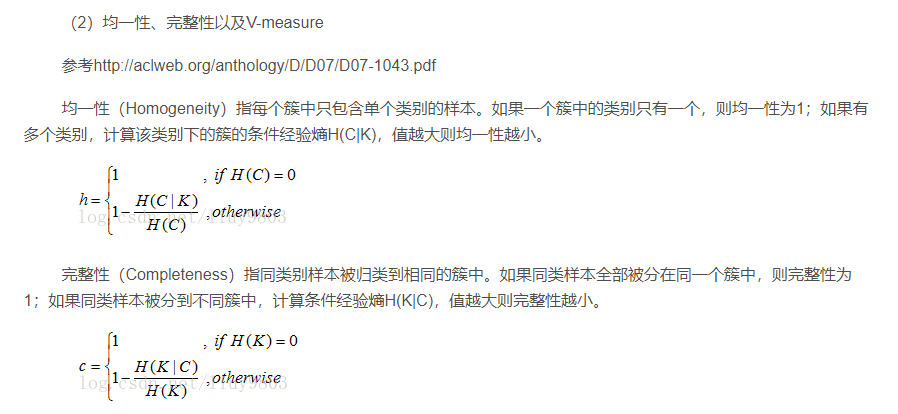

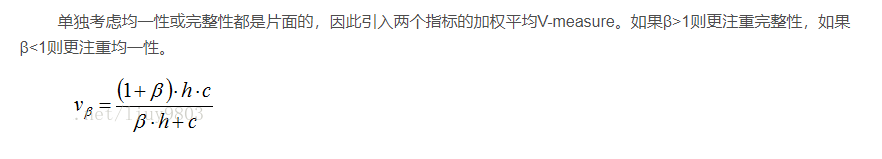

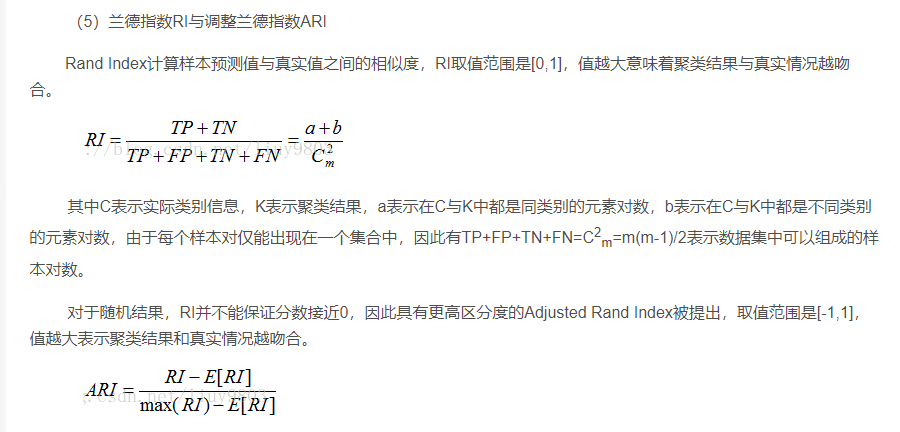

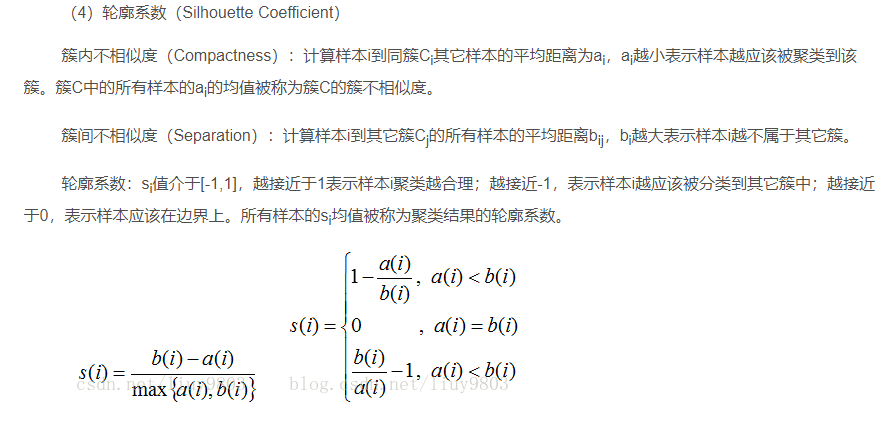

###  评价指标解释链接
https://blog.csdn.net/liuy9803/article/details/80762862?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-1.not_use_machine_learn_pai&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-1.not_use_machine_learn_pai

###  测试

In [172]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

###   聚类算法汇总

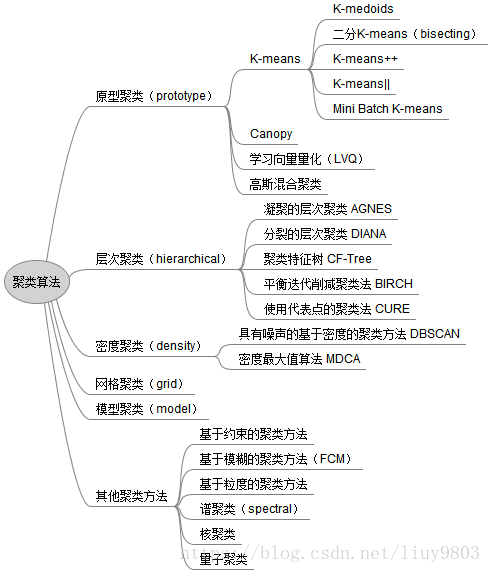

###  再次练习--聚类

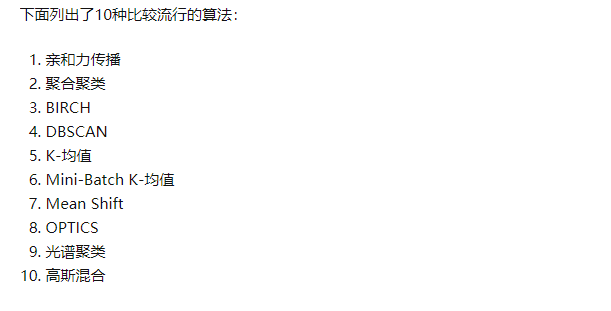

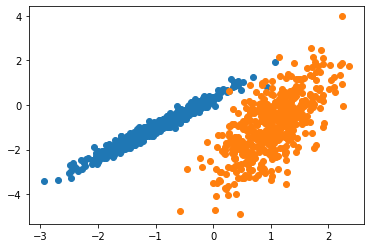

In [182]:
# 综合分类数据集
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# 定义数据集
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 为每个类的样本创建散点图
for class_value in range(2):
    # 获取此类的示例的行索引
    row_ix = where(y == class_value)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例将创建合成的聚类数据集，然后创建输入数据的散点图，其中点由类标签（理想化的群集）着色。

我们可以清楚地看到两个不同的数据组在两个维度，并希望一个自动的聚类算法可以检测这些分组。

#####  1:亲和力传播聚类

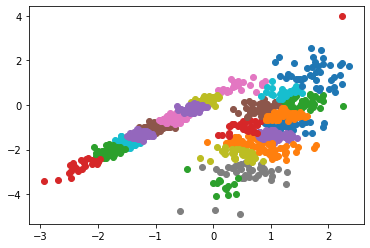

In [185]:

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = AffinityPropagation(damping=0.9)
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。

在这种情况下，我无法取得良好的结果

##### 2:聚合聚类

聚合聚类涉及合并示例，直到达到所需的群集数量为止。
它是层次聚类方法的更广泛类的一部分，通过 AgglomerationClustering 类实现的

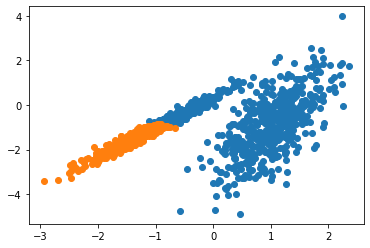

In [186]:
from sklearn.cluster import AgglomerativeClustering

# 定义模型
model = AgglomerativeClustering(n_clusters=2)

# 模型拟合与聚类预测
yhat = model.fit_predict(X)

# 检索唯一群集
clusters = unique(yhat)

# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
# 绘制散点图
pyplot.show()


#####  3:BIRCHBIRCH 聚类

（BIRCH 是平衡迭代减少的缩写，聚类使用层次结构)包括构造一个树状结构，从中提取聚类质心。

它是通过 Birch 类实现的，主要配置是“ threshold ”和“ n _ clusters ”超参数，后者提供了群集数量的估计。下面列出了完整的示例。



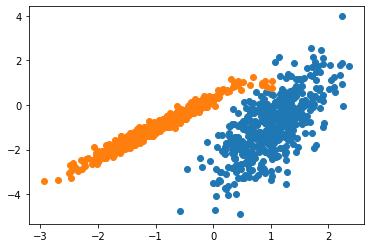

In [187]:

# birch聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# 定义模型
model = Birch(threshold=0.01, n_clusters=2)

# 适配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

###  4.DBSCAN

DBSCAN 聚类（其中 DBSCAN 是基于密度的空间聚类的噪声应用程序）涉及在域中寻找高密度区域，并将其周围的特征空间区域扩展为群集

它是通过 DBSCAN 类实现的，主要配置是“ eps ”和“ min _ samples ”超参数。

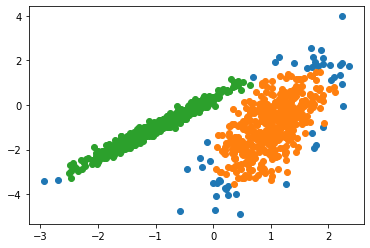

In [191]:
# dbscan 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = DBSCAN(eps=0.3, min_samples=9)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# 绘制散点图
pyplot.show()

#####  5:K均值

K-均值聚类可以是最常见的聚类算法，并涉及向群集分配示例，以尽量减少每个群集内的方差。

它是通过 K-均值类实现的，要优化的主要配置是“ n _ clusters ”超参数设置为数据中估计的群集数量。

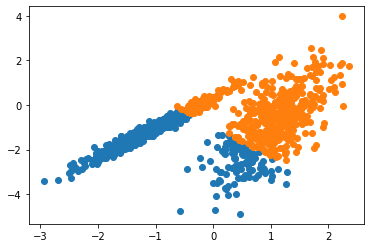

In [193]:
# k-means 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = KMeans(n_clusters=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# 绘制散点图
pyplot.show()

#####  6:Mini-Batch K-均值

Mini-Batch K-均值是 K-均值的修改版本，它使用小批量的样本而不是整个数据集对群集质心进行更新，这可以使大数据集的更新速度更快，并且可能对统计噪声更健壮。

它是通过 MiniBatchKMeans 类实现的，要优化的主配置是“ n _ clusters ”超参数，设置为数据中估计的群集数量。

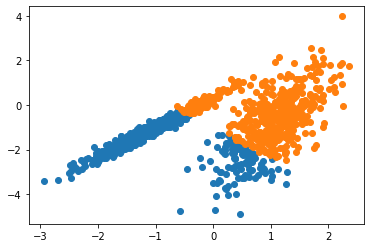

In [195]:
# mini-batch k均值聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MiniBatchKMeans(n_clusters=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)

# 检索唯一群集
clusters = unique(yhat)

# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
# 绘制散点图
pyplot.show()

In [198]:
where([True,True,True,False,False,True,True,True,False])

(array([0, 1, 2, 5, 6, 7], dtype=int64),)

#####  7:均值漂移聚类

均值漂移聚类涉及到根据特征空间中的实例密度来寻找和调整质心。

它是通过 MeanShift 类实现的，主要配置是“带宽”超参数。

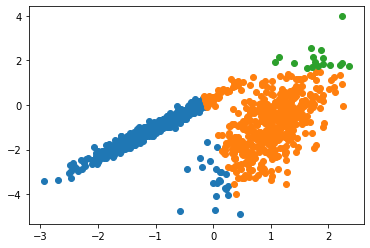

In [200]:
# 均值漂移聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MeanShift()
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
# 绘制散点图
pyplot.show()

#####  8:OPTICS

OPTICS 聚类（ OPTICS 短于订购点数以标识聚类结构）是上述 DBSCAN 的修改版本。

它是通过 OPTICS 类实现的，主要配置是“ eps ”和“ min _ samples ”超参数。

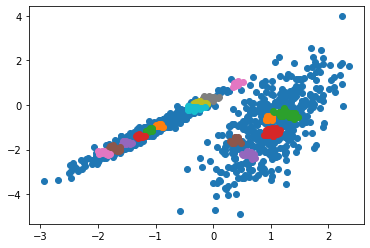

In [202]:
# optics聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = OPTICS(eps=0.8, min_samples=10)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集

clusters = unique(yhat)
# 为每个群集的样本创建散点图

for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# 绘制散点图
pyplot.show()

#####  9:光谱聚类

光谱聚类是一类通用的聚类方法，取自线性线性代数。

它是通过 Spectral 聚类类实现的，而主要的 Spectral 聚类是一个由聚类方法组成的通用类，取自线性线性代数。

要优化的是“ n _ clusters ”超参数，用于指定数据中的估计群集数量。

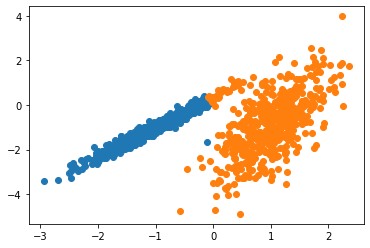

In [203]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = SpectralClustering(n_clusters=2)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
# 绘制散点图
pyplot.show()

##### 10:高斯混合模型

高斯混合模型总结了一个多变量概率密度函数，顾名思义就是混合了高斯概率分布。

它是通过 Gaussian Mixture 类实现的，要优化的主要配置是“ n _ clusters ”超参数，用于指定数据中估计的群集数量。

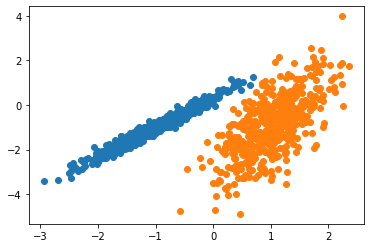

In [204]:
# 高斯混合模型
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = GaussianMixture(n_components=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
# 绘制散点图
pyplot.show()

In [107]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
print(cluster1)
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
use_a = np.hstack((cluster1, cluster2)).T
use_a

[[1.04486344 1.37894939 1.40065833 0.89023166 1.05108899 0.93029066
  0.66617883 0.54861833 1.20841564 0.50419656]
 [1.27572203 1.23023247 0.74475436 1.21693357 1.36047202 1.32865334
  0.63764317 1.15371506 1.04100247 1.16007131]]


array([[1.04486344, 1.27572203],
       [1.37894939, 1.23023247],
       [1.40065833, 0.74475436],
       [0.89023166, 1.21693357],
       [1.05108899, 1.36047202],
       [0.93029066, 1.32865334],
       [0.66617883, 0.63764317],
       [0.54861833, 1.15371506],
       [1.20841564, 1.04100247],
       [0.50419656, 1.16007131],
       [3.64458472, 3.59698264],
       [4.29995179, 3.84546534],
       [4.41460018, 3.92419436],
       [3.60808892, 4.45912371],
       [4.43328042, 4.0793599 ],
       [4.12856152, 4.21452836],
       [3.99429434, 4.11483591],
       [3.72973785, 3.79194162],
       [4.11425931, 3.61174345],
       [3.75865061, 4.22134921]])

In [106]:
pd.DataFrame(use_a)

,0,1
0,1.146082,1.088238
1,1.220945,0.896927
2,0.680090,1.036054
3,0.832175,0.691345
4,0.679482,1.025264
5,1.118582,1.420741
6,0.904472,1.193837
7,1.393958,1.374044
8,0.793977,0.916953
9,1.457090,1.241986
